In [5]:
import sys
sys.path.append('../src')
from agent import EconomicAgent, CopAgent
from model import EconomicModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
model = EconomicModel(num_econ_agents=30, initial_cops=0, width=10, height = 10, election_frequency=20, interaction_memory=20)
for i in range(1000):
    model.step()

In [38]:
#the model data contains data collected at the model level
#mostly through counters that agents update when they do stuff
#this will show current model params or cumulative data
model_data = model.datacollector.get_model_vars_dataframe()

#agent data is collected at the agent level. Watch out because cops are still agents but don't have many params
#so NaN values are for cops, these can be dropped when calculating most stats
agent_data = model.datacollector.get_agent_vars_dataframe()


In [39]:
agent_data.dropna()#this drops cop data from the agent-centered stats
mean_df = agent_data.groupby('Step').mean().reset_index()
df = pd.merge(model_data, mean_df)

In [22]:
df

,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,param,value
800,0,5.0,42.0,6.0,0.05,135.103210,4.416788,4.553268,227.663417,0.269333,0.0,election frequency,50
801,1,5.0,52.0,12.0,0.05,155.043160,13.496563,3.729121,186.456075,0.372667,0.0,election frequency,50
802,2,5.0,66.0,14.0,0.05,176.004267,22.289021,3.510606,175.530307,0.388000,0.0,election frequency,50
803,3,5.0,78.0,15.0,0.05,200.108301,32.040643,3.345994,167.299678,0.378333,0.0,election frequency,50
804,4,5.0,92.0,18.0,0.05,242.353839,38.587083,2.929786,146.489325,0.430333,0.0,election frequency,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,195,4.0,1124.0,107.0,0.04,3205.338829,2249.054652,1.433400,71.670018,0.424000,0.0,election frequency,50
996,196,4.0,1124.0,107.0,0.04,3205.338829,2258.599359,1.494595,74.729726,0.424000,0.0,election frequency,50
997,197,4.0,1124.0,107.0,0.04,3205.338829,2269.100670,1.565307,78.265339,0.424000,0.0,election frequency,50
998,198,4.0,1124.0,107.0,0.04,3205.338829,2274.939051,1.575366,78.768278,0.424000,0.0,election frequency,50


In [49]:
data_elec_freq = pd.read_csv('../results/vary_election_freq_results.csv')

data_elec_freq

,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,param,value
0,0,5.0,34.0,6.0,0.05,76.048041,4.652699,4.565868,228.293403,0.255667,0.0,election frequency,10
1,1,5.0,58.0,10.0,0.05,135.526764,12.254111,4.108498,205.424886,0.341000,0.0,election frequency,10
2,2,5.0,66.0,10.0,0.05,161.534946,17.177924,3.957521,197.876070,0.325000,0.0,election frequency,10
3,3,5.0,86.0,13.0,0.05,223.275658,18.830573,3.596497,179.824847,0.344333,0.0,election frequency,10
4,4,5.0,100.0,14.0,0.05,251.289538,26.021415,3.499975,174.998769,0.337333,0.0,election frequency,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,195,4.0,1124.0,107.0,0.04,3205.338829,2249.054652,1.433400,71.670018,0.424000,0.0,election frequency,50
996,196,4.0,1124.0,107.0,0.04,3205.338829,2258.599359,1.494595,74.729726,0.424000,0.0,election frequency,50
997,197,4.0,1124.0,107.0,0.04,3205.338829,2269.100670,1.565307,78.265339,0.424000,0.0,election frequency,50
998,198,4.0,1124.0,107.0,0.04,3205.338829,2274.939051,1.575366,78.768278,0.424000,0.0,election frequency,50


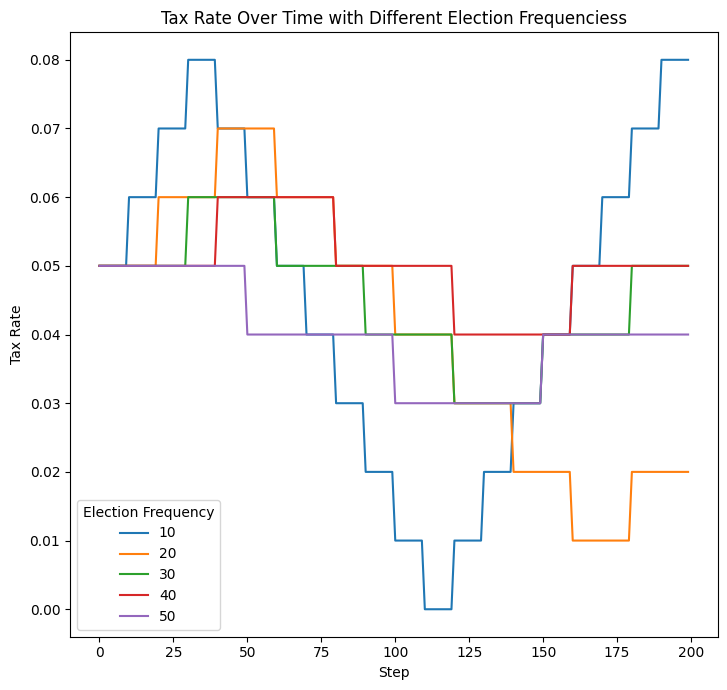

In [73]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
ax1 = plt.gca()  

for label, df in data_elec_freq.groupby('value'):
    ax1.plot(df['Step'], df['tax_rate'], label=f'{label}')
ax1.set_title('Tax Rate Over Time with Different Election Frequenciess')
ax1.set_xlabel('Step')
ax1.set_ylabel('Tax Rate')
ax1.legend(title="Election Frequency")






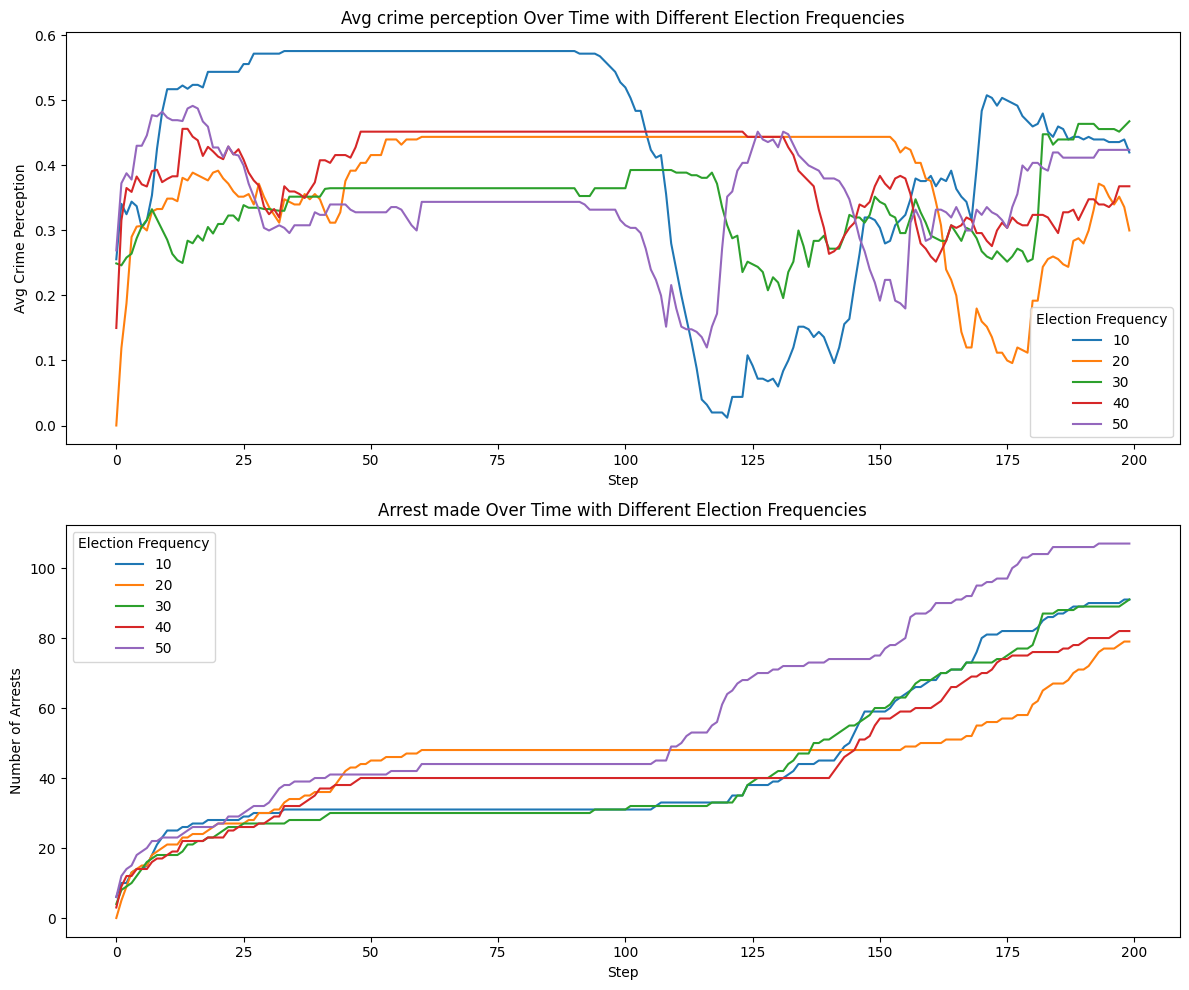

In [82]:


# Arrest over time with different election frequencies
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

for label, df in data_elec_freq.groupby('value'):
    ax[0].plot(df['Step'], df['avg_crime_perception'], label=f'{label}')
ax[0].set_title('Avg crime perception Over Time with Different Election Frequencies')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Avg Crime Perception')
ax[0].legend(title="Election Frequency")

# Arrest over time with different election frequencies
for label, df in data_elec_freq.groupby('value'):
    ax[1].plot(df['Step'], df['num_arrests_made'], label=f'{label}')
ax[1].set_title('Arrest made Over Time with Different Election Frequencies')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Number of Arrests')
ax[1].legend(title="Election Frequency")


plt.tight_layout()
plt.show()






In [102]:
data_prosperity= pd.read_csv('../results/vary_prosperity_results.csv')
data_prosperity

,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,param,value
0,0,5.0,34.0,5.0,0.05,82.241782,0.000000,4.351599,217.579961,0.231667,0.0,prosperity,0.01
1,1,5.0,58.0,8.0,0.05,149.863740,3.578994,3.906574,195.328700,0.274000,0.0,prosperity,0.01
2,2,5.0,76.0,9.0,0.05,203.781103,7.616269,3.663987,183.199358,0.262667,0.0,prosperity,0.01
3,3,5.0,96.0,13.0,0.05,243.904293,10.546502,3.122647,156.132348,0.320333,0.0,prosperity,0.01
4,4,5.0,104.0,13.0,0.05,256.689973,13.336221,2.999685,149.984265,0.317000,0.0,prosperity,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,195,4.0,1248.0,95.0,0.04,4211.589649,2364.576114,1.480792,74.039603,0.340000,0.0,prosperity,3.00
1396,196,4.0,1252.0,97.0,0.04,4213.540684,2367.345483,1.449606,72.480296,0.364000,0.0,prosperity,3.00
1397,197,4.0,1256.0,98.0,0.04,4215.974188,2370.771360,1.350732,67.536579,0.372000,0.0,prosperity,3.00
1398,198,4.0,1256.0,98.0,0.04,4215.974188,2374.473133,1.342871,67.143557,0.372000,0.0,prosperity,3.00


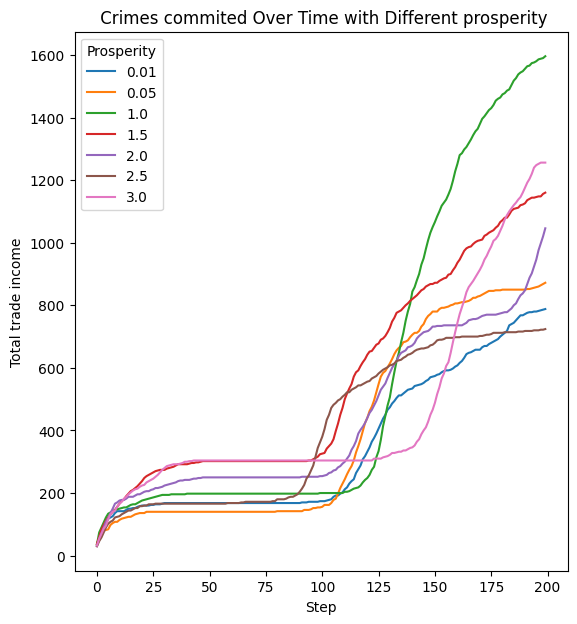

In [105]:
plt.figure(figsize=(14, 7))

# to see if the avg individual's wealth would affect the number of police
plt.subplot(121)
ax1 = plt.gca()  
for label, df in data_prosperity.groupby('value'):
    ax1.plot(df['Step'], df['num_crimes_committed'], label=f'{label}')
ax1.set_title(' Crimes commited Over Time with Different prosperity')
ax1.set_xlabel('Step')
ax1.set_ylabel('Crimes Committed')
ax1.legend(title="Prosperity")


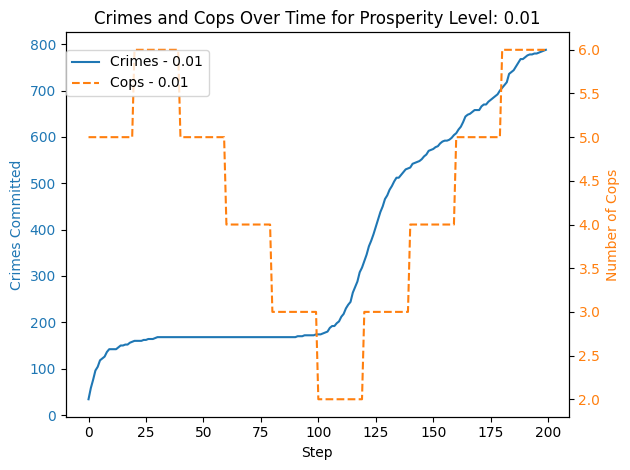

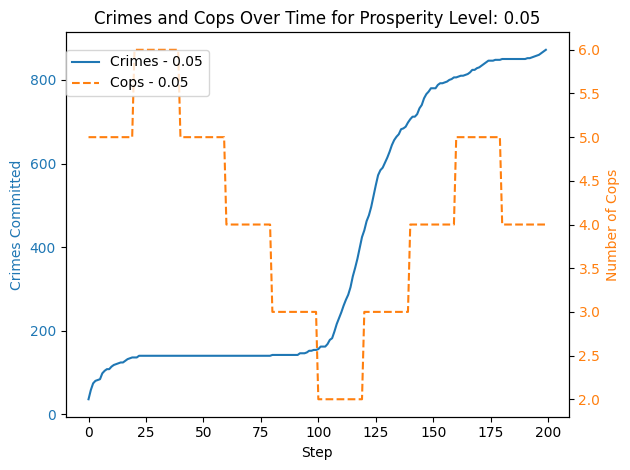

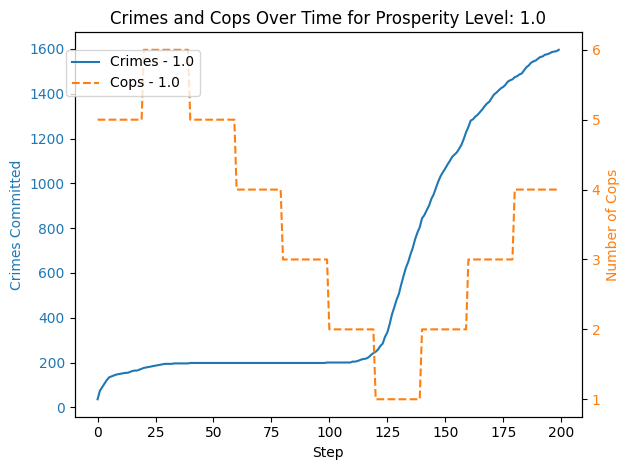

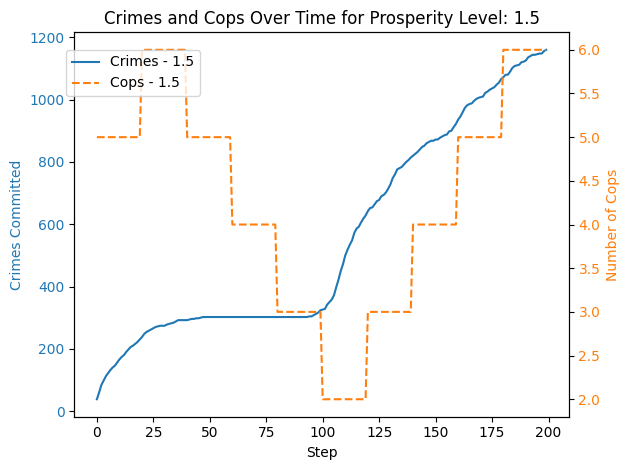

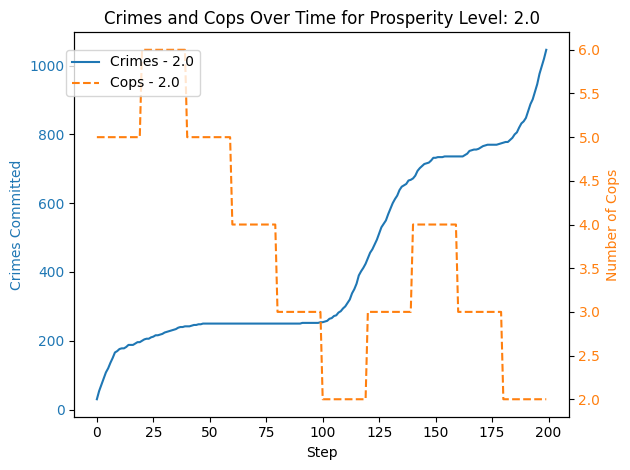

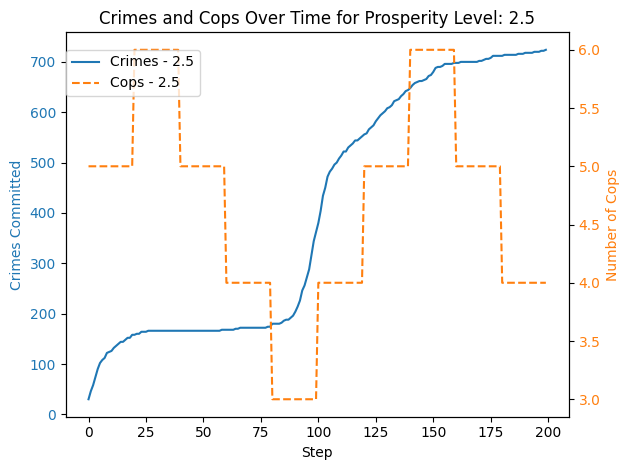

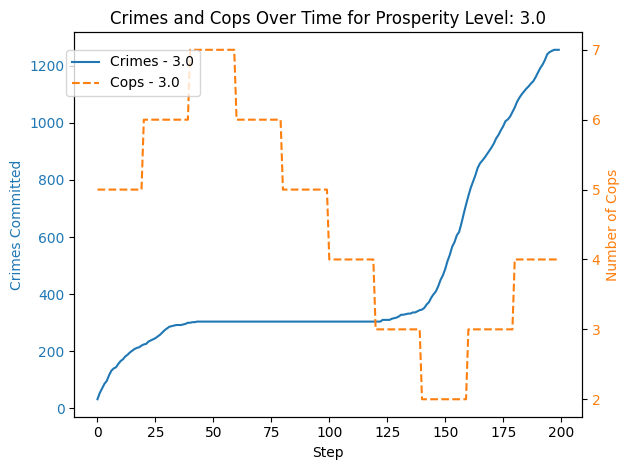

In [121]:
#crimes commited over time with different prosperity and number of cops

for label, df in data_prosperity.groupby('value'):
    fig, ax1 = plt.subplots()

    # Plotting crimes committed
    ax1.plot(df['Step'], df['num_crimes_committed'], label=f'Crimes - {label}', color='tab:blue')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Crimes Committed', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Creating a twin y-axis for the number of cops
    ax2 = ax1.twinx()
    ax2.plot(df['Step'], df['num_cops'], label=f'Cops - {label}', color='tab:orange', linestyle='dashed')
    ax2.set_ylabel('Number of Cops', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Title and layout adjustments
    plt.title(f'Crimes and Cops Over Time for Prosperity Level: {label}')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    plt.show()







In [ ]:
for label, df in data_prosperity.groupby('value'):
    ax1.plot(df['Step'], df['num_crimes_committed'], label=f'{label}')

In [90]:
data_sentences = pd.read_csv('../results/vary_sentence_results.csv')
data_sentences



,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,param,value
0,0,5.0,32.0,4.0,0.05,74.487792,7.077777,4.238025,211.901252,0.186667,0.0,sentence length,5
1,1,5.0,50.0,4.0,0.05,113.044807,13.185416,4.092376,204.618815,0.160667,0.0,sentence length,5
2,2,5.0,72.0,6.0,0.05,155.388179,21.223274,3.629927,181.496365,0.211333,0.0,sentence length,5
3,3,5.0,98.0,9.0,0.05,225.502116,24.735510,3.195228,159.761415,0.228333,0.0,sentence length,5
4,4,5.0,122.0,10.0,0.05,273.701086,26.979005,3.047135,152.356744,0.237667,0.0,sentence length,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,195,6.0,924.0,87.0,0.06,4382.437330,4053.832413,0.439017,21.950840,0.448000,0.0,sentence length,25
996,196,6.0,928.0,87.0,0.06,4383.097872,4056.025245,0.439684,21.984177,0.440000,0.0,sentence length,25
997,197,6.0,932.0,87.0,0.06,4383.951268,4057.251741,0.427989,21.399463,0.440000,0.0,sentence length,25
998,198,6.0,938.0,87.0,0.06,4385.206092,4058.286487,0.414694,20.734694,0.428000,0.0,sentence length,25


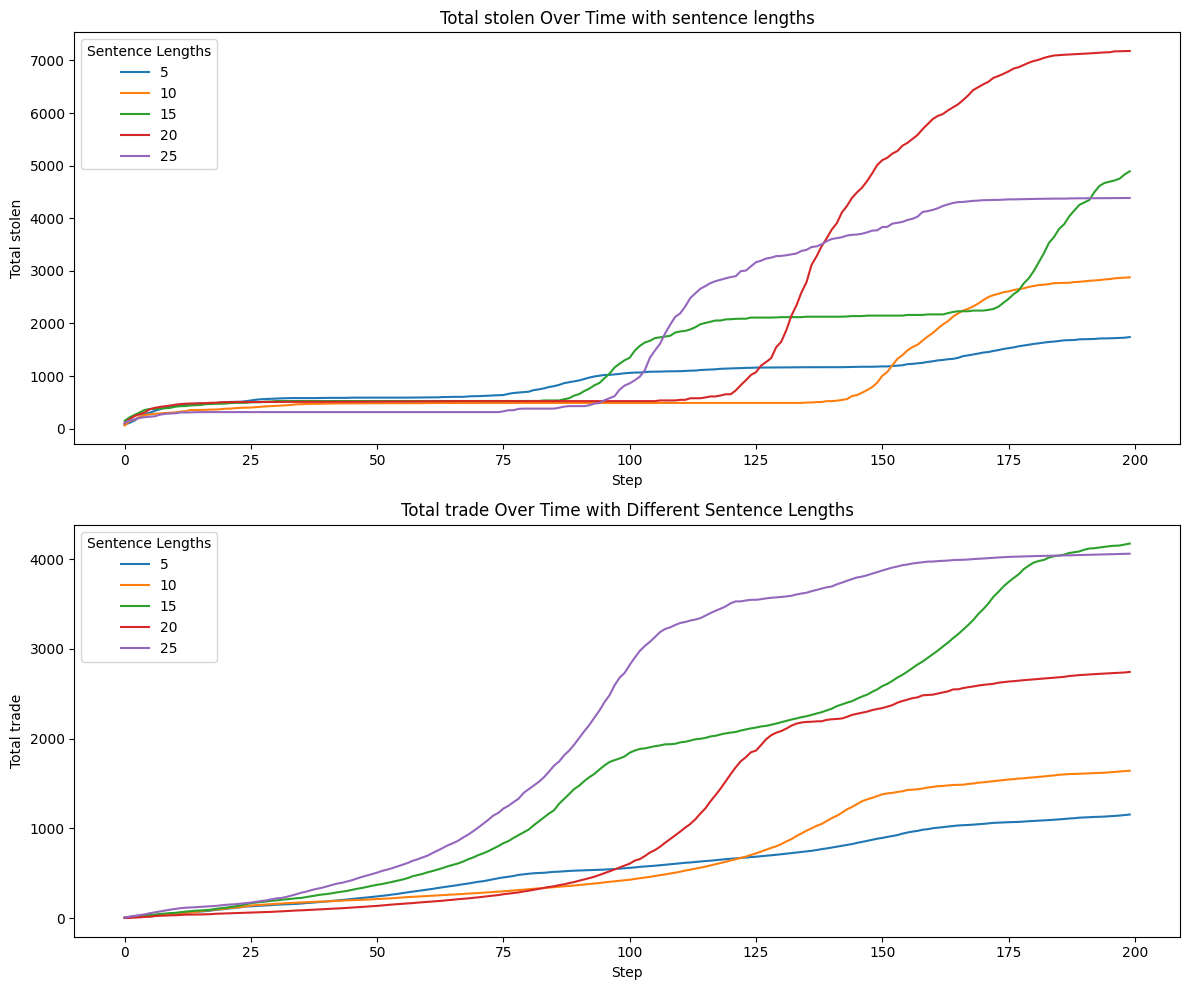

In [94]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

for label, df in data_sentences.groupby('value'):
    ax[0].plot(df['Step'], df['total_stolen'], label=f'{label}')
ax[0].set_title('Total stolen Over Time with sentence lengths')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Total stolen')
ax[0].legend(title="Sentence Lengths")

for label, df in data_sentences.groupby('value'):
    ax[1].plot(df['Step'], df['total_trade_income'], label=f'{label}')
ax[1].set_title('Total trade Over Time with Different Sentence Lengths')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Total trade')
ax[1].legend(title="Sentence Lengths")

plt.tight_layout()
plt.show()

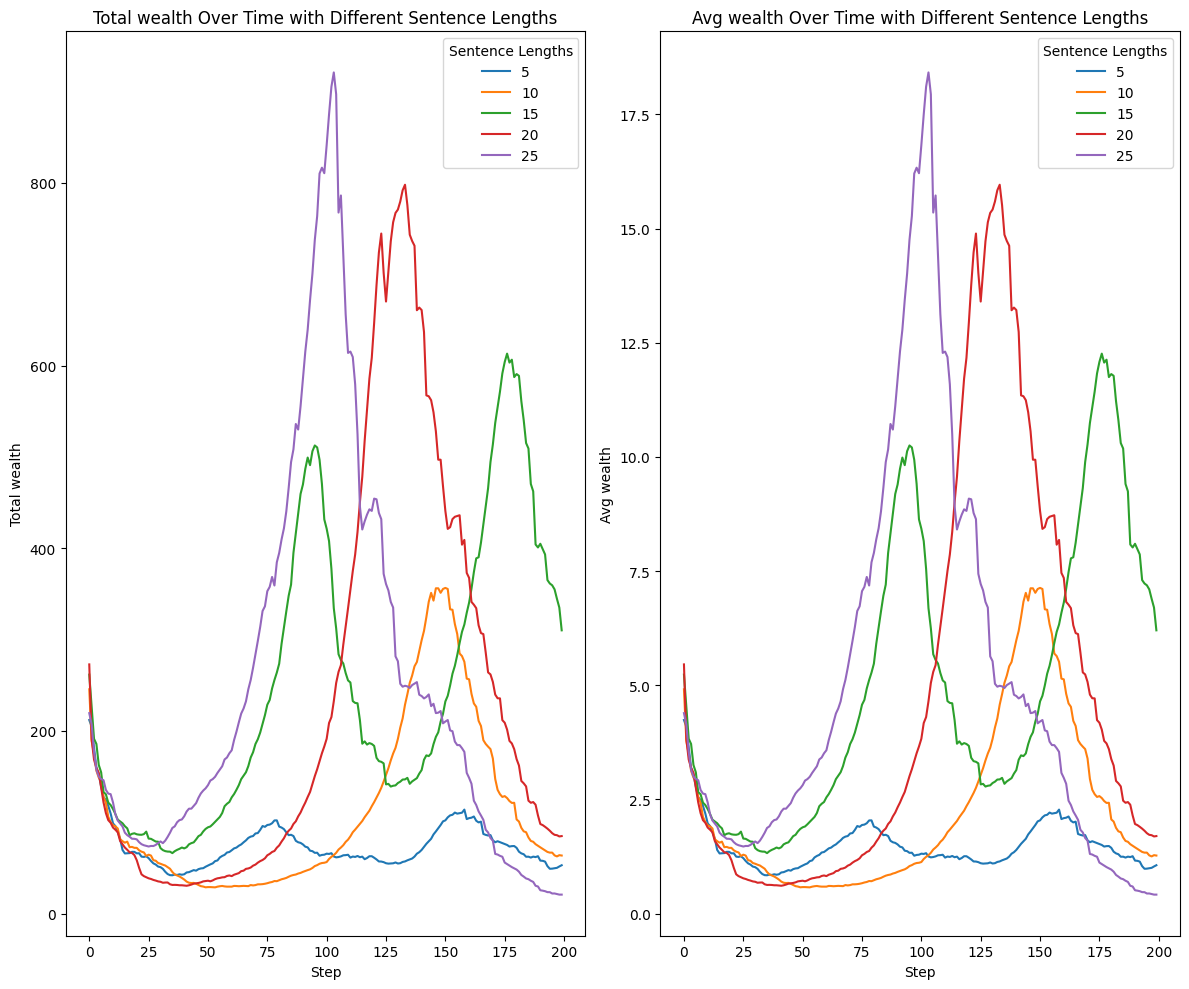

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10), sharex=False)

for label, df in data_sentences.groupby('value'):
    ax[0].plot(df['Step'], df['total_wealth'], label=f'{label}')
ax[0].set_title('Total wealth Over Time with Different Sentence Lengths')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Total wealth')
ax[0].legend(title="Sentence Lengths")


for label, df in data_sentences.groupby('value'):
    ax[1].plot(df['Step'], df['avg_wealth'], label=f'{label}')
ax[1].set_title('Avg wealth Over Time with Different Sentence Lengths')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Avg wealth')
ax[1].legend(title="Sentence Lengths")

plt.tight_layout()
plt.show()